1. 2018-06-01 10:06:00: 查看FTP故障数据，gearbox_lubrication_filter_inlet_pressure显示大于10bar；上机组检查发现滤芯污染，有较多杂质，将过滤器内壁进行清理，更换新的滤芯，启机后观察进出口压力正常，机组恢复正常运行。
1. 2018/8/29  5:08:00: 齿轮箱巡检，二级大后轴承存在磨损，需更换齿轮箱。

In [1]:
import os
import sys
sys.path.append("../../")
from imp import reload

import Reader
import toolkit
import visualization
# import GearboxFaultDetector
import model_entry

Using TensorFlow backend.
D:\Software\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# reload(Reader)

In [3]:
feature_path = r"D:/Workspace/python_workspace/gearbox-fault-detection/local/feature/san_tang_hu/"
speed_path = r"D:\Workspace\python_workspace\gearbox-fault-detection\local\rotating_speed\san_tang_hu"
wind_turbine = "76"
sensors = (
    "gearbox",
    "low_speed_shaft",
    "high_speed_shaft",
)

In [4]:
reader = Reader.Reader()
feature = reader.read_feature(os.path.join(feature_path, wind_turbine), sensors)
speed = reader.read_speed(os.path.join(speed_path, wind_turbine), sensors)

toolkit.print_shape(feature=feature)

feature.shape: (149, 75)


array([[<AxesSubplot:title={'center':'speed'}>]], dtype=object)

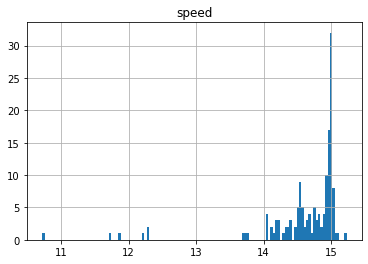

In [5]:
speed.hist(bins=128)

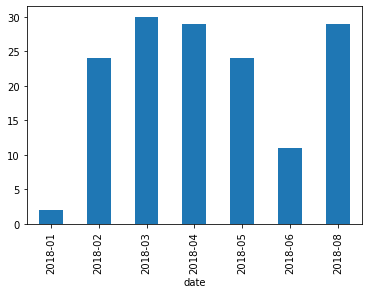

In [6]:
# feature = feature[speed.speed >= 1000]
# speed = speed[speed.speed >= 1000]

# toolkit.print_shape(feature=feature, speed=speed)

visualization.data_distribution(feature)

In [7]:
# 划分train set, test set
train_start = "2018-01"
train_end = "2018-04"

test_start = "2018-05"
test_end = "2018"

feature_train = feature[train_start: train_end]
# speed_train = speed[train_start: train_end]

feature_test = feature[test_start: test_end]
# speed_test = speed[test_start: test_end]

toolkit.print_shape(feature_train=feature_train, feature_test=feature_test)

feature_train.shape: (85, 75)
feature_test.shape: (64, 75)


In [8]:
feature_test = feature["2018-01": ]
# speed_test = speed

In [9]:
detector = model_entry.OutlierDetector()

In [10]:
detector.fit(feature_train)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.











<AxesSubplot:xlabel='date'>

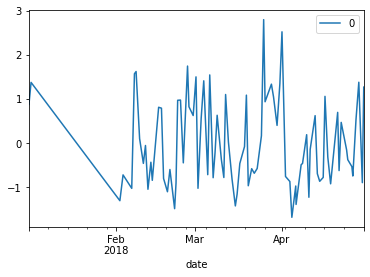

In [11]:
detector.decision_scores.plot()

In [12]:
anomaly_scores = detector.decision_function(feature_test)

<AxesSubplot:xlabel='date'>

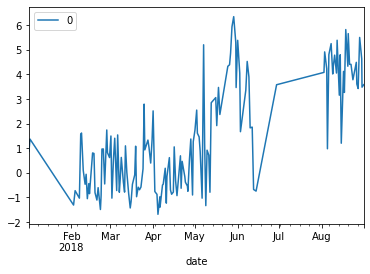

In [13]:
anomaly_scores.plot()

In [14]:
anomaly_scores[anomaly_scores[0] > 4]

,0
date,
2018-05-07 12:00,5.206386
2018-05-25 00:00,4.331478
2018-05-26 06:00,4.394323
2018-05-27 00:00,4.870857
2018-05-28 00:00,5.938191
2018-05-29 06:00,6.349589
2018-05-30 18:00,5.305089
2018-06-01 03:00,5.387228
2018-06-02 15:00,4.052655
